# Ailie Kwak

## Research question/interests

**Research Question: Overall, does a healthy mind dimension help to maintain low-stress levels? If so, which factors of the healthy mind dimension are related to low-stress levels and how does it differ based on one's demographic information?**

Stress level is affected by many different factors, I assume that factors related to a healthy mind would impact stress level the most. Also, people who are having a healthy mind, a good emotional, psychological, and social well-being, would have a low-stress levels. Among the different factors in the healthy mind dimension, I am wondering which factors would contribute the most to the low-stress level and it differ based on one's demographic information such as gender and age. 

### Analysis Plan

1. I will subset the factors (FLOW, DAILY_SHOUTING, WEEKLY MEDITATION, DAILY_STRESS, AGE, and GENDER) that I am interested in from the whole dataset.
2. I would like to remove missing values (NA) that might negatively impact on the result.
3. I will consider outliers in the dataset in the next analysis.
4. I will create a new column, combine all 3 factors and see if healthy mind factors, together, helps to maintain low-stress level
5. I would investigate the correlation of each factor with stress levels. I would visualise each correlation using a scatter plot to show the correlation and relative information such as the error bar and line of best fit.
6. Then I would compare the correlation value to find a factor that impacts low-stress levels the most. 
7. I plan to compare the correlation of each factor by visualising it in one plot since all three measures are in the same unit (0 - 10 times).
8. I would use 100% stacked bar, Diverging bars instead of simple bar graph side by side to visualise the data.

<br> Version:
* This section has been updated for Milestone 3, Task 2. (Mar. 4, 2023)
* This section has been updated for Milestone 4 after TA's feedback session (Mar 17, 2023)

## Loading Data

In [ ]:
# importing Pandas package to load a data file to notebook
import pandas as pd

In [ ]:
# Loading data by using read_csv() function
data = pd.read_csv("../data/raw/Wellbeing_and_lifestyle_data_Kaggle.csv")
data

# Milestone 3

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("../data/raw/Wellbeing_and_lifestyle_data_Kaggle.csv")
data

In [ ]:
# It allows to see how many rows and columns in dataset
data.shape #(rows, columns)

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
data.describe().T

In [ ]:
data.describe(exclude = "number").T

### Initial Thoughts
* Most of the columns are in numeric veriables.
* Only 4 columns are in non-numeric veriables.
* 'DAILY_STRESS' column seems like to contain numberic variables but it is not. For correlation analysis, I will change the type to numeric.

#### Explore the Dataset

In [ ]:
data.DAILY_STRESS.unique()

In [ ]:
# Subsetted columns that I want to explore.
data_cleaned = data.drop(['Timestamp', 'FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 
                          'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'DAILY_STEPS',
                          'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 
                          'TIME_FOR_PASSION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'], axis = "columns")
data_cleaned

In [ ]:
data_cleaned = data_cleaned.dropna()
data_cleaned

##### Observations:
* There is no missing value.

In [ ]:
# Dropped a row which contain invalid format value - '1/1/00'.
not_stress_levels = ['1/1/00']
data_cleaned = data_cleaned[data_cleaned.DAILY_STRESS.isin(not_stress_levels) == False]
data_cleaned['DAILY_STRESS'].unique()

In [ ]:
# Reset the index and dropped old index column.
data_cleaned = data_cleaned.reset_index()
data_cleaned = data_cleaned.drop(['index'], axis = 'columns')
data_cleaned

#### Visualisation

In [ ]:
# Creat Box plot to explore distribution and outliers of each catetory.
plt.rcParams["figure.figsize"] = [10.00, 4.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 3)
sns.boxplot(data = data_cleaned, x = "WEEKLY_MEDITATION", y = "DAILY_STRESS", ax=axes[0])
sns.boxplot(data = data_cleaned, x = "FLOW", y = "DAILY_STRESS", ax=axes[1])
sns.boxplot(data = data_cleaned, x = "DAILY_SHOUTING", y = "DAILY_STRESS", ax=axes[2])

##### Observations:
* There is no outliers in WEEKLY MEDITATION column.
* There is few ourliers in FLOW and DAILY SHOUTING columns. 
* In WEEKLY MEDITATION column, DAILY STRESS 0 has widest variation among the values.
* In DAILY SHOUTING column, DAILY STRESS 5 has widest variation among the values.

In [ ]:
# Create bar graph to see average IVs in each DV value (0, 1, 2, 3, 4, 5)
plt.rcParams["figure.figsize"] = [10.00, 4.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 3)
sns.barplot(data = data_cleaned, x = "WEEKLY_MEDITATION", y = "DAILY_STRESS", order = ['0', '1', '2', '3', '4', '5'], ax=axes[0])
sns.barplot(data = data_cleaned, x = "FLOW", y = "DAILY_STRESS", order = ['0', '1', '2', '3', '4', '5'], ax=axes[1])
sns.barplot(data = data_cleaned, x = "DAILY_SHOUTING", y = "DAILY_STRESS", order = ['0', '1', '2', '3', '4', '5'], ax=axes[2])

##### Observations:
* Lower stress levels have higher mean of amount of weekly meditation
* Lower stress levels have higher mean of Flow state
* Lower stress levels have lower mean of amount of Daily shouting
* All independent variables, WEEKLY MEDITATION, FLOW, and DAILY SHOUTING has a relationsihp with DAILY STRESS as more healthy mind related with lower daily stress.

Since it is unable to create scatter plot with the value collected from likert scale, I instead show heat map to visualise the correlation between DV ('Daily stress') and IVs (flow, daily shouting, weekly meditation)

In [ ]:
data_cleaned_n = data_cleaned
data_cleaned_n['DAILY_STRESS'] = pd.to_numeric(data_cleaned_n['DAILY_STRESS'])

In [ ]:
corr = data_cleaned_n.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

##### Observations:
* DAILY STRESS and FLOW are negatively correlated. It means that lower stress level has higher flow state.
* DAILY STRESS and WEEKLY MEDITATION are negatively correlated. It means that lower stress level has higher amount of doing weekly meditation.
* DAILY STRESS AND DAILY SHOUTING is positively correlated. It means that lower stress level has lower amount of shouting in a day.

# Milestone 4

**Research Question: Overall, does a healthy mind dimension help to maintain low-stress levels? If so, which factors of the healthy mind dimension are related to low-stress levels and how does it differ based on one's demographic information?**

1. Load data
* Load and encoding raw data
2. Clean data
* Remove unneccessary columns that is not needed to answer research question
* Remove any missing data (There is no missing data here)
* One of the value in DAILY_STRESS column is entered incorreclty. Thus any rows that contain incorrect value removed.
3. Process data
* Change the data type of DAILY_STRESS to numeric variable
* Add Weighted_Score column, reverse code DAILY_SHOUTING column because more shouting means there were more stressful situations.
* Change all column names to upper case
4. Wrangle data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 

In [2]:
import sys
sys.path.append('code')
from project_functions1 import load_clean_process
data = load_clean_process("../data/raw/Wellbeing_and_lifestyle_data_Kaggle.csv")

### Analysis data

#### Exploaring Dataset

In [6]:
# It allows to see how many rows and columns in dataset
data.shape #(rows, columns)

(15971, 7)

In [5]:
# Check all column names
data.columns

Index(['DAILY_STRESS', 'FLOW', 'DAILY_SHOUTING', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'WEIGHTED_SCORE'],
      dtype='object')

In [4]:
# Description of numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DAILY_STRESS,15971.0,2.791685,1.367801,0.0,2.0,3.0,4.0,5.0
FLOW,15971.0,3.194477,2.357285,0.0,1.0,3.0,5.0,10.0
DAILY_SHOUTING,15971.0,2.931000,2.676341,0.0,1.0,2.0,4.0,10.0
WEEKLY_MEDITATION,15971.0,6.233611,3.016479,0.0,4.0,7.0,10.0,10.0
WEIGHTED_SCORE,15971.0,78.077954,26.380912,0.0,64.0,80.0,94.0,150.0


In [3]:
# Description of non-numerical variables
data.describe(exclude = "number").T

,count,unique,top,freq
AGE,15971,4,21 to 35,6107
GENDER,15971,2,Female,9858


##### Observations
* My dataset has 15971 rows and 7 columns.
* 5 columns are in numeric veriables.
* 2 columns are in non-numeric veriables.

#### Visualisation

[Text(0.5, 1.0, 'Relationship between Daily Stress Level and weighted Healthy Mind Score'),
 Text(0.5, 0, 'Healthy Mind Score'),
 Text(0, 0.5, 'Daily Stress Level')]

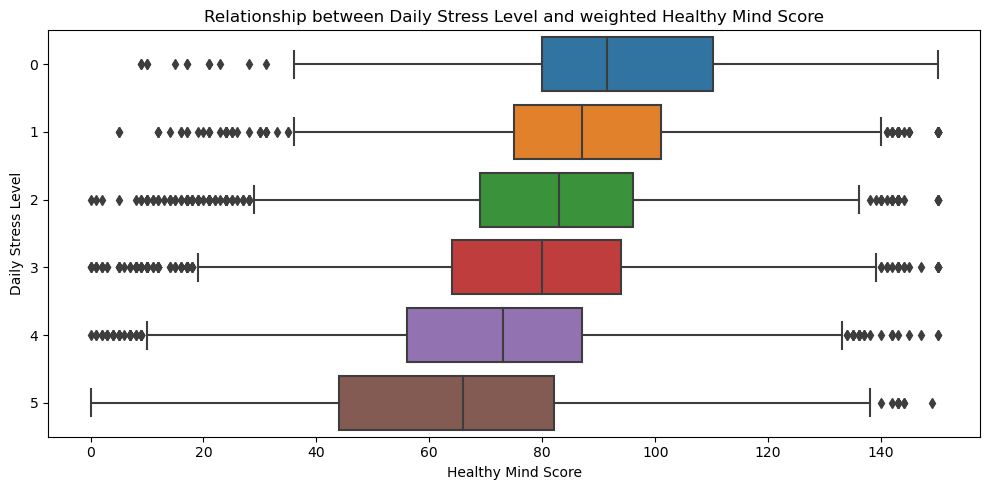

In [37]:
plt.rcParams["figure.figsize"] = [10, 5]
sns.boxplot(data = data, x="WEIGHTED_SCORE", y="DAILY_STRESS", orient = "h").set(title = "Relationship between Daily Stress Level and weighted Healthy Mind Score", xlabel = "Healthy Mind Score", ylabel = "Daily Stress Level")

##### Observations
* Higher Healthy Mind Score, lower Daily Stress Level.
* It implies that Healthy Mind is related with low Daily Stress Level.

[Text(0.5, 0, 'Number of Daily Shouting'), Text(0, 0.5, '')]

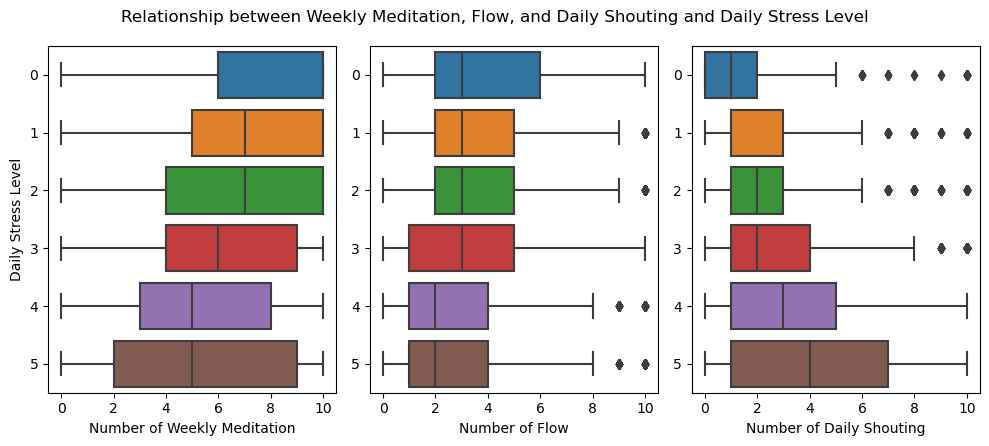

In [43]:
# Creat Box plot to explore distribution and relationship with DV of each catetory.
plt.rcParams["figure.figsize"] = [10.00, 4.50]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(1, 3)
fig.suptitle("Relationship between Weekly Meditation, Flow, and Daily Shouting and Daily Stress Level")
sns.boxplot(data = data, x = "WEEKLY_MEDITATION", y = "DAILY_STRESS", ax=axes[0], orient = 'h').set(xlabel = "Number of Weekly Meditation", ylabel = "Daily Stress Level")
sns.boxplot(data = data, x = "FLOW", y = "DAILY_STRESS", ax=axes[1], orient = 'h').set(xlabel = "Number of Flow", ylabel = "")
sns.boxplot(data = data, x = "DAILY_SHOUTING", y = "DAILY_STRESS", ax=axes[2], orient = 'h').set(xlabel = "Number of Daily Shouting", ylabel = "")

##### Observations
* There is no outliers in WEEKLY MEDITATION column.
* There is few ourliers in FLOW and DAILY SHOUTING columns. 
* In WEEKLY MEDITATION column, DAILY STRESS 0 has widest variation among the values.
* In DAILY SHOUTING column, DAILY STRESS 5 has widest variation among the values.
* As people do more number of weekly meditation, lower daily stress level exhibit.
* There is no significant relationship exhibit between number of flow state and daily stress level.
* As people shout less tme, lower daily stress elvel exhibit.

/var/folders/5h/7rgs793n7blgzr8kd22gmg_m0000gn/T/ipykernel_55052/1407324297.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


Text(0.5, 0.98, 'Correlation Matrix between all variables')

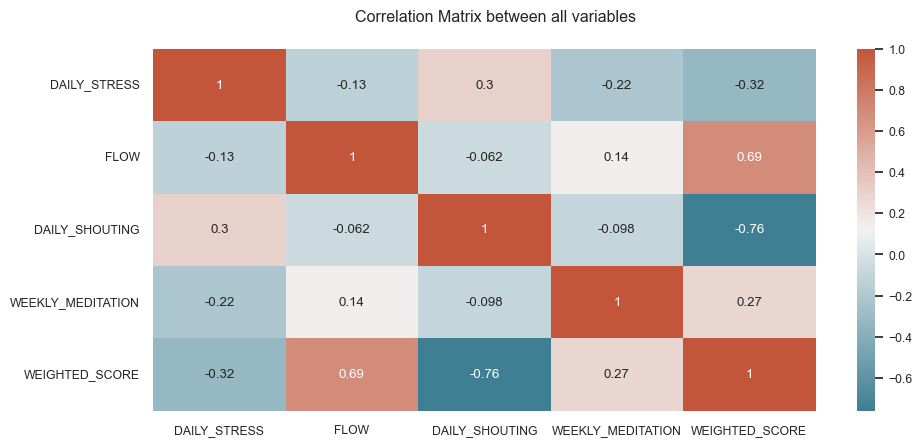

In [57]:
corr = data.corr()
sns.set_theme(font_scale = 0.8)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.suptitle("Correlation Matrix between all variables")

##### Observations
* DAILY STRESS and FLOW are negatively correlated (r = -0.13). It means that the lower stress level, the higher flow state.
* DAILY STRESS and WEEKLY MEDITATION are negatively correlated (r = -0.22). It means that the lower stress level, the higher amount of doing weekly meditation.
* DAILY STRESS AND DAILY SHOUTING is positively correlated (r = 0.3). It means that the lower stress level, the lower amount of shouting in a day.
* Amongh 3 variables, FLOW, DAILY SHOUTING, WEEKLY MEDITATION, DAILY_SHOUTING has highest correlation with DAILY_STRESS with correlation coefficient of 0.3.

AttributeError: 'list' object has no attribute 'move_legend'

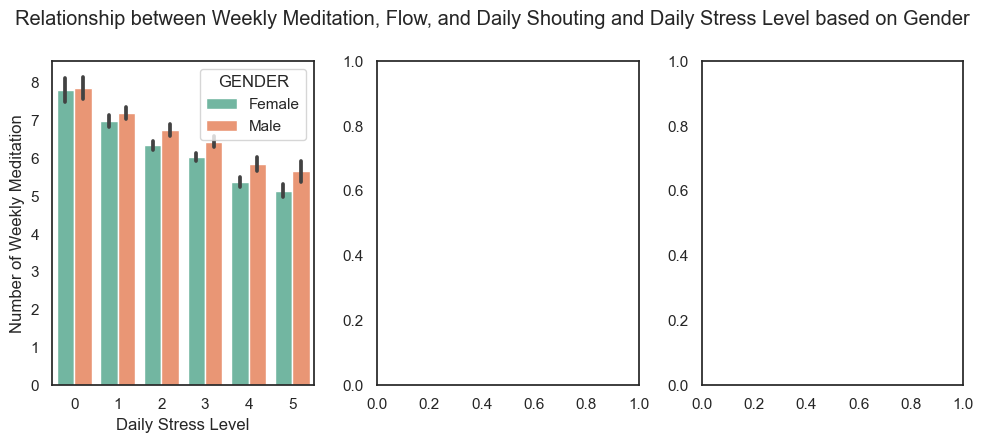

In [61]:
# Create bar graph to see average IVs in each DV value (0, 1, 2, 3, 4, 5) based on gender
sns.set_theme(style = "white", palette = "Set2")
plt.rcParams["figure.figsize"] = [10.00, 4.50]
plt.rcParams["figure.autolayout"] = True
fig, axes = plt.subplots(1, 3)
fig.suptitle("Relationship between Weekly Meditation, Flow, and Daily Shouting and Daily Stress Level based on Gender")
sns.barplot(data = data, y = "WEEKLY_MEDITATION", x = "DAILY_STRESS", ax=axes[0], hue = "GENDER").set(ylabel = "Number of Weekly Meditation", xlabel = "Daily Stress Level").move_legend("upper left", bbox_to_anchor=(1, 1))
sns.barplot(data = data, y = "FLOW", x = "DAILY_STRESS", ax=axes[1], hue = "GENDER").set(ylabel = "Number of Flow", xlabel = "Daily Stress Level")
sns.barplot(data = data, y = "DAILY_SHOUTING", x = "DAILY_STRESS", ax=axes[2], hue = "GENDER").set(ylabel = "Number of Daily Shouting", xlabel = "Daily Stress Level")

##### Observations
* In the relationship between number of weekly meditation and daily stress level, male reported more number of weekly meditation than female throughout the daily stress levels.
* In the relationship between nummber of flow state and daily stress level, female reported more number of flow state than male from daily stress level of 1 to 5. In daily stress level of 0, male reported more number of flow state than female.
* In the relationship between number of daily shouting and daily stress level, female reported more number of daily shouting than male through the daily stress levels.

<AxesSubplot:xlabel='DAILY_STRESS', ylabel='DAILY_SHOUTING'>

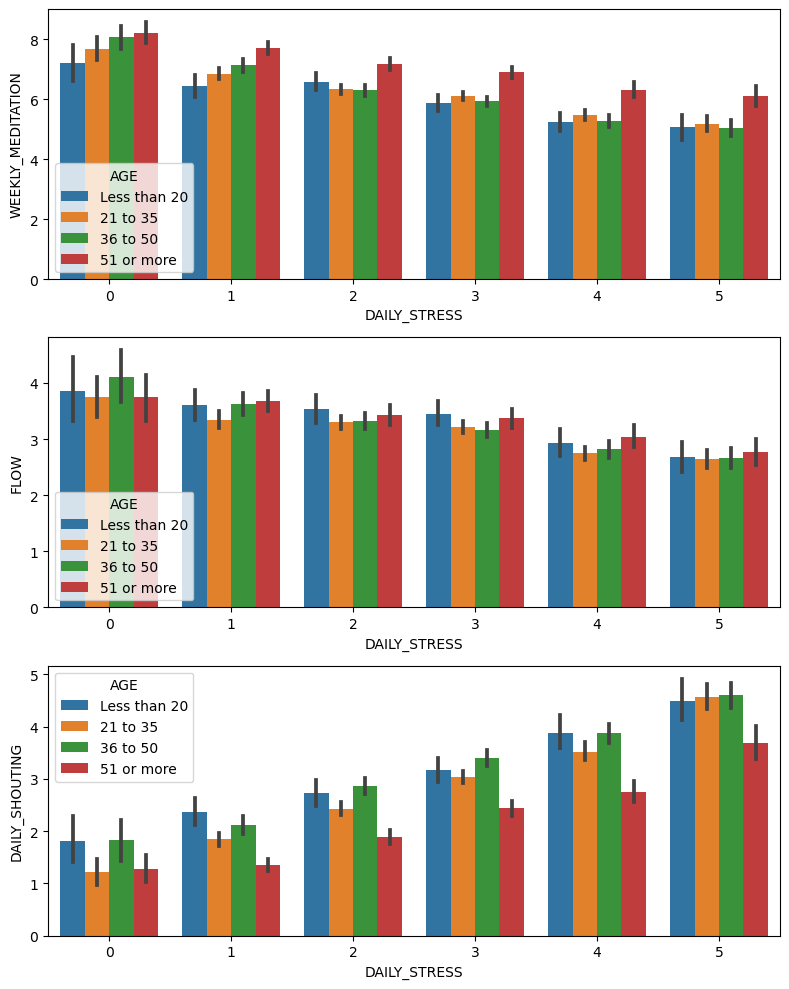

In [31]:
# Create bar graph to see the relationship between IVs and DVs based on Age
plt.rcParams["figure.figsize"] = [8, 10]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(3, 1)
sns.barplot(data = data, y = "WEEKLY_MEDITATION", x = "DAILY_STRESS", hue = "AGE", ax=axes[0], hue_order = ["Less than 20", "21 to 35", "36 to 50", "51 or more"])
sns.barplot(data = data, y = "FLOW", x = "DAILY_STRESS", hue = "AGE", ax=axes[1], hue_order = ["Less than 20", "21 to 35", "36 to 50", "51 or more"])
sns.barplot(data = data, y = "DAILY_SHOUTING", x = "DAILY_STRESS", hue = "AGE", ax=axes[2], hue_order = ["Less than 20", "21 to 35", "36 to 50", "51 or more"])

##### Observations
* In the relationship between number of weekly meditation and daily stress level, age group of '51 or more' always reported highest number of weekly meditation level among age groups throughout the all daily stress levels. 
* In the relationship between nummber of flow state and daily stress level, all age groups reported similar number of flow state throughout the all daily stress levels.
* In the relationship between number of daily shouting and daily stress level, age group of '51 or more' reported lowest number of daily shouting among age groups throughout the all daily stress levels.